<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20255/Assignment%202/Dimension_Reduction_Techniques_Image_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 : Dimensionality Reduction Techniques on Image Data

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import plotly.express as px
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
from time import time
from itertools import zip_longest

## Loading the Dataset

In [2]:
digits = load_digits(n_class=5)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
X.shape

(901, 64)

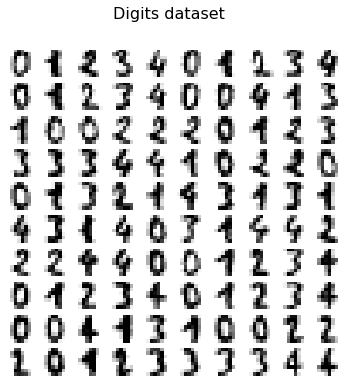

In [3]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Digits dataset", fontsize=16)

## Principal Component Analysis (PCA)

In [4]:
from sklearn.decomposition import PCA
 
pca_2 = PCA(2)
data_embeddings_pca_2 = pca_2.fit_transform(X)

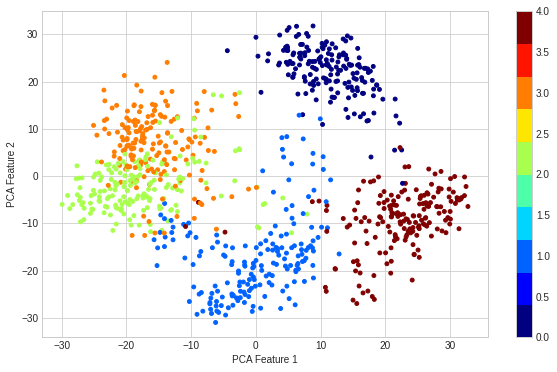

In [5]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(data_embeddings_pca_2[:, 0], data_embeddings_pca_2[:, 1], s = 15,
            cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('PCA Feature 1') , plt.ylabel('PCA Feature 2')

plt.show()

In [6]:
print('Variance captured by 2 Components = ', np.cumsum(pca_2.explained_variance_ratio_ * 100)[1])

Variance captured by 2 Components =  41.075071799490146


In [7]:
pca_3 = PCA(3)
data_embeddings_pca_3 = pca_3.fit_transform(X)

In [8]:
print('Variance captured by 3 Components = ', np.cumsum(pca_3.explained_variance_ratio_ * 100)[2])

Variance captured by 3 Components =  53.031699935955515


In [9]:
graph_pca = px.scatter_3d(
    data_embeddings_pca_3, x=0, y=1, z=2, color=y
)
graph_pca.update_traces(marker_size=3)

## Singular Value Decomposition (SVD)

In [10]:
from sklearn.decomposition import TruncatedSVD

truncated_svd_2 =  TruncatedSVD(n_components = 2)
data_embeddings_svd_2 = truncated_svd_2.fit_transform(X)

In [11]:
print('Variance captured by 2 Components = ', np.cumsum(truncated_svd_2.explained_variance_ratio_ * 100)[1])

Variance captured by 2 Components =  25.32836368784417


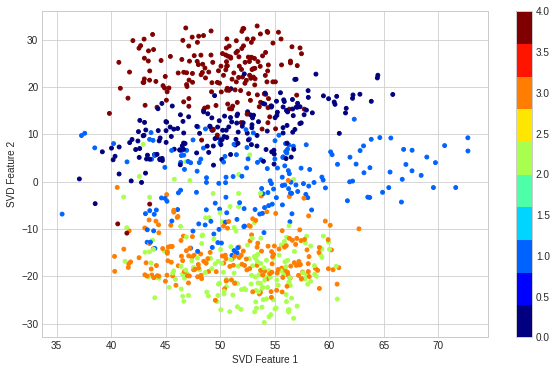

In [12]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(data_embeddings_svd_2[:, 0], data_embeddings_svd_2[:, 1], s = 15, cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('SVD Feature 1') , plt.ylabel('SVD Feature 2')
plt.show()

In [13]:
truncated_svd_3 =  TruncatedSVD(n_components = 3)
data_embeddings_svd_3 = truncated_svd_3.fit_transform(X)

In [14]:
print('Variance captured by 3 Components = ', np.cumsum(truncated_svd_3.explained_variance_ratio_ * 100)[2])

Variance captured by 3 Components =  43.77514011278791


In [15]:
graph_svd = px.scatter_3d(
    data_embeddings_svd_3, x=0, y=1, z=2, color=y
)
graph_svd.update_traces(marker_size=3)

## Locally Linear Embedding (LLE)

In [16]:
from sklearn.manifold import LocallyLinearEmbedding

lle_2= LocallyLinearEmbedding(n_components = 2, n_neighbors=10)
data_embeddings_lle_2 = lle_2.fit_transform(X)

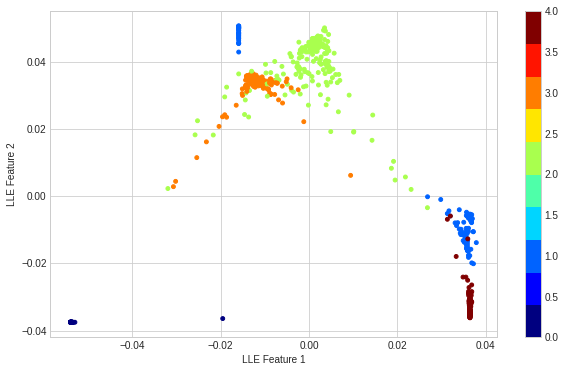

In [17]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(data_embeddings_lle_2[:, 0], data_embeddings_lle_2[:, 1], s = 15,
            cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('LLE Feature 1') , plt.ylabel('LLE Feature 2')
plt.show()

In [18]:
lle_3 = LocallyLinearEmbedding(n_components = 3, n_neighbors=10)
data_embeddings_lle_3 = lle_3.fit_transform(X)

In [19]:
graph_lle = px.scatter_3d(
     data_embeddings_lle_3, x=0, y=1, z=2, color=y
)
graph_lle.update_traces(marker_size=3)

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [20]:
from sklearn.manifold import TSNE

tsne_2 = TSNE()
data_embeddings_tsne_2 = tsne_2.fit_transform(X)

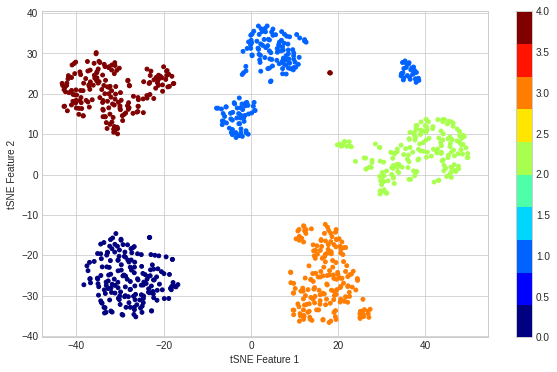

In [21]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(data_embeddings_tsne_2[:, 0], data_embeddings_tsne_2[:, 1], s = 15,
            cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('tSNE Feature 1') , plt.ylabel('tSNE Feature 2')
plt.show()

In [22]:
tsne_3 = TSNE(n_components=3)
data_embeddings_tsne_3 = tsne_3.fit_transform(X)

In [23]:
graph_tsne = px.scatter_3d(
     data_embeddings_tsne_3, x=0, y=1, z=2, color=y
)
graph_tsne.update_traces(marker_size=3)

## Isometric Mapping (ISOMAP)

In [24]:
from sklearn.manifold import Isomap

isomap_2 = Isomap(n_components = 2)
data_embeddings_isomap_2 = isomap_2.fit_transform(X)

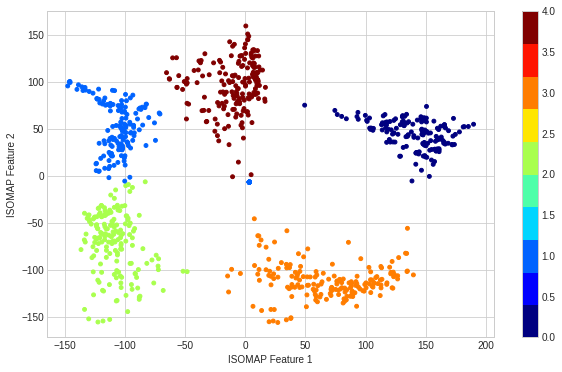

In [25]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(data_embeddings_isomap_2[:, 0], data_embeddings_isomap_2[:, 1], s = 15,
            cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('ISOMAP Feature 1') , plt.ylabel('ISOMAP Feature 2')
plt.show()

In [26]:
isomap_3 = Isomap(n_components = 3)
data_embeddings_isomap_3 = isomap_3.fit_transform(X)

In [27]:
graph_isomap = px.scatter_3d(
     data_embeddings_isomap_3, x=0, y=1, z=2, color=y
)
graph_isomap.update_traces(marker_size=3)

## Uniform Manifold Approximation and Projection (UMAP)

In [28]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 31.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=46dcb7847c0df2531d4c6ff71206d4b64b9d8042fc72bd1416f48b8607f2a570
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=64522fc286b7f6b0c64e6105162cf96c79cdbaf4ff26baf16ed7f9b6f487f8b8
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [29]:
import umap

In [30]:
umap_2= umap.UMAP(n_neighbors=5, random_state=0)
data_embeddings_umap_2 = umap_2.fit(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



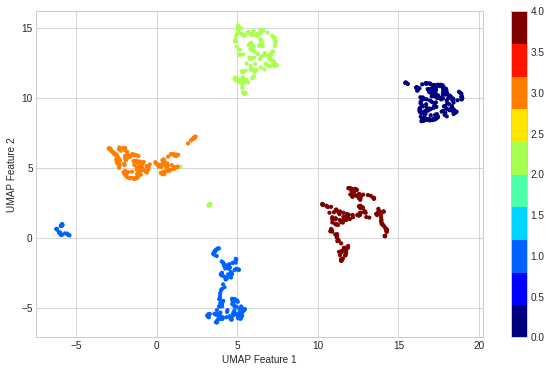

In [31]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(data_embeddings_umap_2.embedding_[:, 0], data_embeddings_umap_2.embedding_[:, 1], s = 10, cmap=c_map , c = y)
plt.colorbar()
plt.xlabel('UMAP Feature 1') , plt.ylabel('UMAP Feature 2')
plt.show()

In [32]:
umap_3 = umap.UMAP(n_components = 3, n_neighbors=5, random_state = 0)
data_embeddings_umap_3 = umap_3.fit_transform(X)

In [33]:
graph_umap = px.scatter_3d(
    data_embeddings_umap_3, x=0, y=1, z=2, color=y
)
graph_umap.update_traces(marker_size=3)

## Comparing the Results of 6 Dimensionality Reduction Techniques

In [34]:
n_neighbors = 10
embeddings = {
    "PCA" : PCA(n_components=2),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2, random_state=0
    ),
    "UMAP" :  umap.UMAP(n_neighbors=5, random_state=0)
}

In [35]:
def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)

    shown_images = np.array([[1.0, 1.0]])
    for i in range(X.shape[0]):
        ax.text(
            X[i, 0],
            X[i, 1],
            str(y[i]),
            color=plt.cm.Dark2(y[i]),
            fontdict={"weight": "bold", "size": 9},
        )
        distance = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(distance) < 4e-3:
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [36]:
projections, timing = {}, {}
for name, transformer in embeddings.items():
  data = X
  print(f"Computing {name}...")
  start_time = time()
  projections[name] = transformer.fit_transform(data, y)
  timing[name] = time() - start_time

Computing PCA...
Computing Truncated SVD embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing t-SNE embeedding...
Computing UMAP...


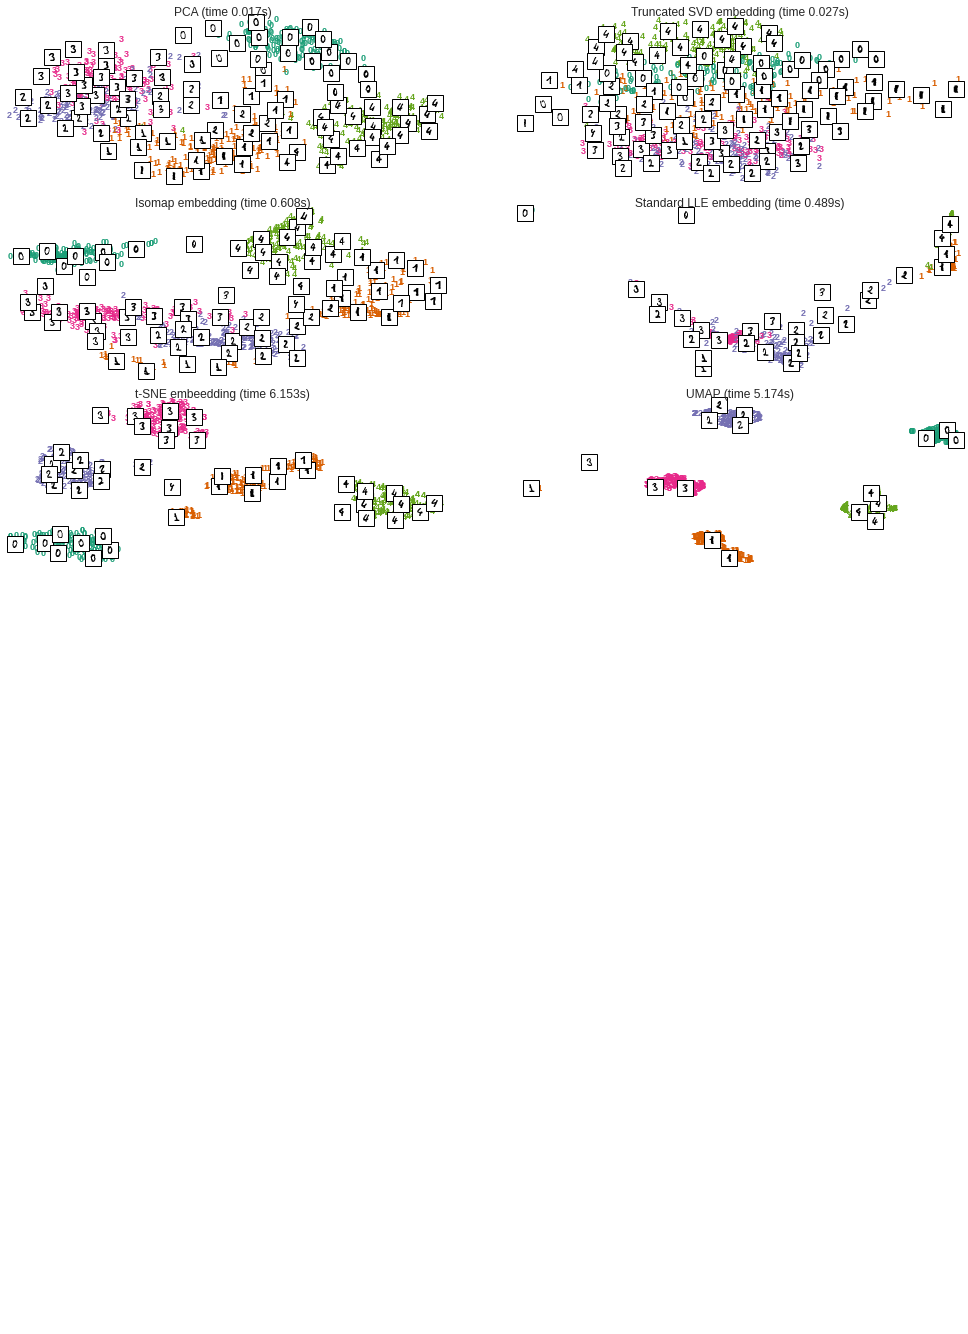

In [37]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title, ax)

plt.show()

* Here for the digit dataset, we selected 10 number of neighbours and transformed 64 features into 2 features using different dimentionality reduction techniques and compared the results by ploting side by side. 

* From the above graphs we can see that ISOMAP, TSNE and UMAP worked well compared to other dimentionality reduction techniques. However, time taken by TSNE and UMAP are also significantly larger than other techniques. 
* As we can see from the graph that using PCA, SVD and LLE, we can't make one cluster for particular one number. But for ISOMAP, TSNE and UMAP, we can successfully make clusters for particular numbers e.g. clusters made of digit 1.

## References


*   https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
*   https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

*   https://plotly.com/python/3d-charts/






